<a href="https://colab.research.google.com/github/srujanavarma/Life-Expectancy-Prediction/blob/main/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

In [ ]:
os.getcwd()

'C:\\Users\\Srujana\\Downloads'

In [ ]:
os.chdir("C:/Users/Srujana/Desktop/Datasets")

In [ ]:
os.getcwd()

'C:\\Users\\Srujana\\Desktop\\Datasets'

In [ ]:
data=pd.read_csv("Life Expectancy Data.csv")
data

,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Life expectancy
0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,65.0
1,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,59.9
2,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,59.9
3,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,59.5
4,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,59.2
...,...,...,...,...,...,...,...,...,...,...
2933,27,4.36,68.0,31,27.1,67.0,65.0,33.6,454.366654,44.3
2934,26,4.06,7.0,998,26.7,7.0,68.0,36.7,453.351155,44.5
2935,25,4.43,73.0,304,26.3,73.0,71.0,39.8,57.348340,44.8
2936,25,1.72,76.0,529,25.9,76.0,75.0,42.1,548.587312,45.3


In [ ]:
data.apply(lambda x:sum(x.isnull()),axis=0)

infant deaths         0
Alcohol             194
Hepatitis B         553
Measles               0
 BMI                 34
Polio                19
Diphtheria           19
 HIV/AIDS             0
GDP                 448
Life expectancy      10
dtype: int64

# data cleaning

In [ ]:
features=data.iloc[:,:].values
features

array([[6.20000000e+01, 1.00000000e-02, 6.50000000e+01, ...,
        1.00000000e-01, 5.84259210e+02, 6.50000000e+01],
       [6.40000000e+01, 1.00000000e-02, 6.20000000e+01, ...,
        1.00000000e-01, 6.12696514e+02, 5.99000000e+01],
       [6.60000000e+01, 1.00000000e-02, 6.40000000e+01, ...,
        1.00000000e-01, 6.31744976e+02, 5.99000000e+01],
       ...,
       [2.50000000e+01, 4.43000000e+00, 7.30000000e+01, ...,
        3.98000000e+01, 5.73483400e+01, 4.48000000e+01],
       [2.50000000e+01, 1.72000000e+00, 7.60000000e+01, ...,
        4.21000000e+01, 5.48587312e+02, 4.53000000e+01],
       [2.40000000e+01, 1.68000000e+00, 7.90000000e+01, ...,
        4.35000000e+01, 5.47358879e+02, 4.60000000e+01]])

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='median')

In [ ]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.fit(features[:,[1,2,4,5,6,8,9]])
features[:,[1,2,4,5,6,8,9]]=imputer.fit_transform(features[:,[1,2,4,5,6,8,9]])

In [ ]:
df=pd.DataFrame(features)

In [ ]:
df.columns=['infant deaths','Alcohol','Hepatitis B','Measles','BMI','Polio','Diphtheria','HIV/AIDS','GDP','Life expectancy']

In [ ]:
df.apply(lambda x:sum(x.isnull()),axis=0)

infant deaths      0
Alcohol            0
Hepatitis B        0
Measles            0
BMI                0
Polio              0
Diphtheria         0
HIV/AIDS           0
GDP                0
Life expectancy    0
dtype: int64

# exploratory data analysis

In [ ]:
df.describe()

,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Life expectancy
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,30.303948,4.546875,83.022124,2419.592240,38.381178,82.617767,82.393125,1.742103,6611.523863,69.234717
std,117.926501,3.921946,22.996984,11467.272489,19.935375,23.367166,23.655562,5.077785,13296.603449,9.509115
min,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,36.300000
25%,0.000000,1.092500,82.000000,0.000000,19.400000,78.000000,78.000000,0.100000,580.486996,63.200000
50%,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,72.100000
75%,22.000000,7.390000,96.000000,360.250000,56.100000,97.000000,97.000000,0.800000,4779.405190,75.600000
max,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,89.000000


In [ ]:
df.cov()

,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Life expectancy
infant deaths,13906.659712,-52.224639,-454.037711,6.776735e+05,-533.177832,-470.921235,-489.232571,15.108649,-1.612381e+05,-220.652231
Alcohol,-52.224639,15.381658,8.194031,-2.237563e+03,24.473789,19.405273,19.704460,-0.920752,1.632563e+04,14.504381
Hepatitis B,-454.037711,8.194031,528.861274,-1.925662e+04,51.549072,196.082685,244.340976,-9.983771,2.344113e+04,37.223576
Measles,677673.513493,-2237.562851,-19256.621892,1.314983e+08,-40250.226506,-36621.551554,-38623.903996,1799.181015,-1.055942e+07,-17203.439056
BMI,-533.177832,24.473789,51.549072,-4.025023e+04,397.419172,131.020212,132.168893,-24.637028,7.261197e+04,105.570514
Polio,-470.921235,19.405273,196.082685,-3.662155e+04,131.020212,546.024431,372.549703,-18.881109,5.901066e+04,101.856823
Diphtheria,-489.232571,19.704460,244.340976,-3.862390e+04,132.168893,372.549703,559.585612,-19.749618,5.723138e+04,106.220736
HIV/AIDS,15.108649,-0.920752,-9.983771,1.799181e+03,-24.637028,-18.881109,-19.749618,25.783896,-8.276941e+03,-26.880557
GDP,-161238.053937,16325.629103,23441.132870,-1.055942e+07,72611.972473,59010.661381,57231.378970,-8276.940536,1.767997e+08,54427.066968
Life expectancy,-220.652231,14.504381,37.223576,-1.720344e+04,105.570514,101.856823,106.220736,-26.880557,5.442707e+04,90.423268


In [ ]:
df.corr()

,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Life expectancy
infant deaths,1.000000,-0.112918,-0.167421,0.501128,-0.226796,-0.170896,-0.175376,0.025231,-0.102829,-0.196769
Alcohol,-0.112918,1.000000,0.090850,-0.049752,0.313022,0.211744,0.212388,-0.046235,0.313060,0.388918
Hepatitis B,-0.167421,0.090850,1.000000,-0.073021,0.112441,0.364890,0.449151,-0.085497,0.076660,0.170219
Measles,0.501128,-0.049752,-0.073021,1.000000,-0.176069,-0.136669,-0.142385,0.030899,-0.069253,-0.157767
BMI,-0.226796,0.313022,0.112441,-0.176069,1.000000,0.281260,0.280267,-0.243383,0.273932,0.556901
Polio,-0.170896,0.211744,0.364890,-0.136669,0.281260,1.000000,0.673977,-0.159128,0.189926,0.458399
Diphtheria,-0.175376,0.212388,0.449151,-0.142385,0.280267,0.673977,1.000000,-0.164419,0.181953,0.472211
HIV/AIDS,0.025231,-0.046235,-0.085497,0.030899,-0.243383,-0.159128,-0.164419,1.000000,-0.122590,-0.556703
GDP,-0.102829,0.313060,0.076660,-0.069253,0.273932,0.189926,0.181953,-0.122590,1.000000,0.430461
Life expectancy,-0.196769,0.388918,0.170219,-0.157767,0.556901,0.458399,0.472211,-0.556703,0.430461,1.000000


(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C316918388>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3178BDCC8>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C31791AEC8>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C317974148>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3179CE488>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3179C9E48>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C317A7DA48>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C317AD5D08>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C317AD5C88>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C317B85

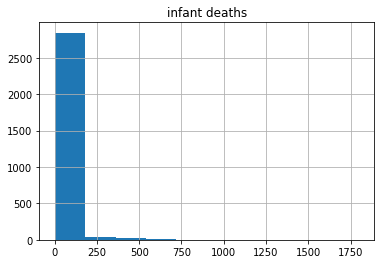

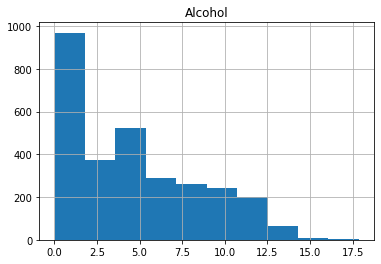

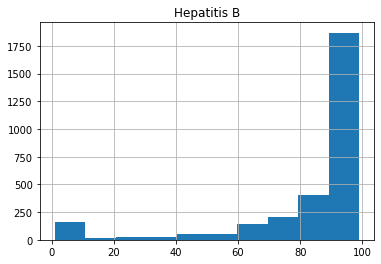

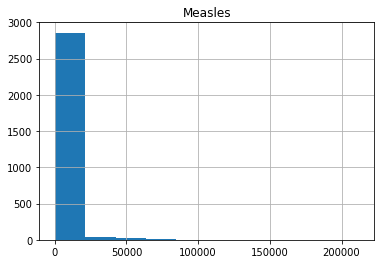

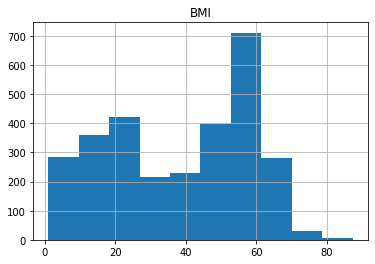

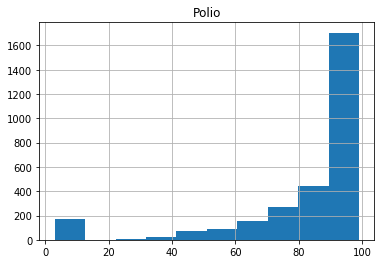

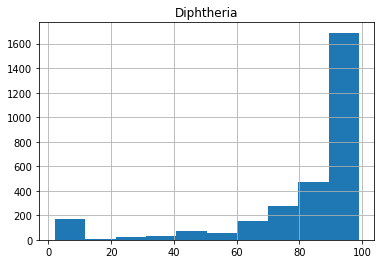

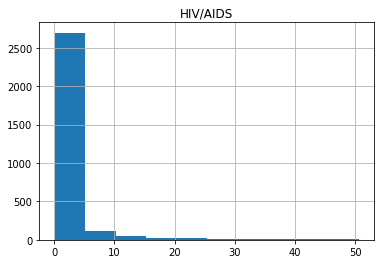

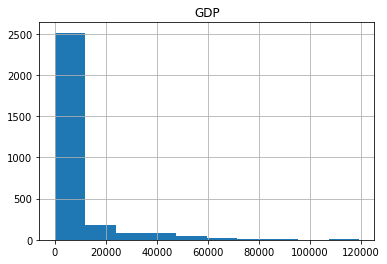

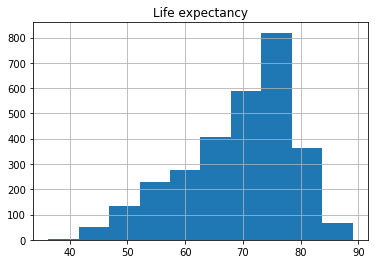

In [ ]:
df.hist('infant deaths',bins=10),df.hist('Alcohol',bins=10),df.hist('Hepatitis B',bins=10),df.hist('Measles',bins=10),df.hist('BMI',bins=10),df.hist('Polio',bins=10),df.hist('Diphtheria',bins=10),df.hist('HIV/AIDS',bins=10),df.hist('GDP',bins=10),df.hist('Life expectancy',bins=10)

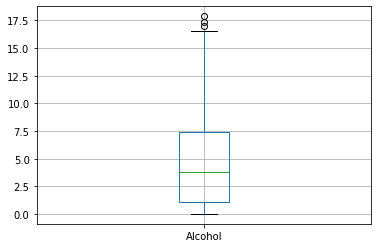

In [ ]:
df.boxplot(column='Alcohol')

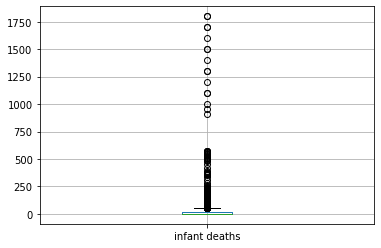

In [ ]:
df.boxplot("infant deaths")

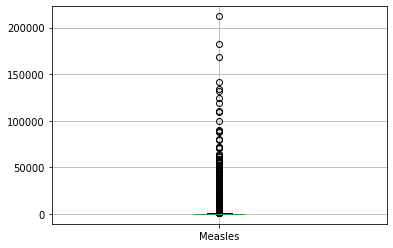

In [ ]:
df.boxplot("Measles")

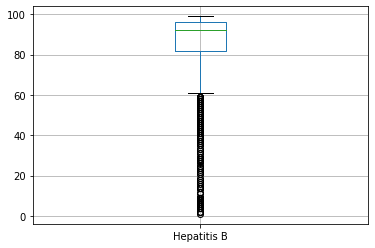

In [ ]:
df.boxplot("Hepatitis B")

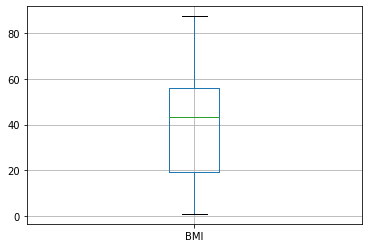

In [ ]:
df.boxplot("BMI")

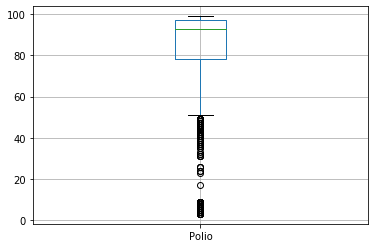

In [ ]:
df.boxplot("Polio")

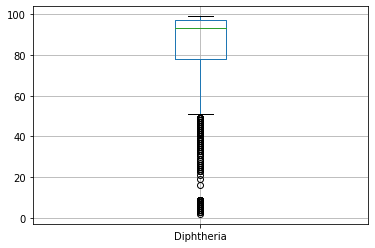

In [ ]:
df.boxplot("Diphtheria")

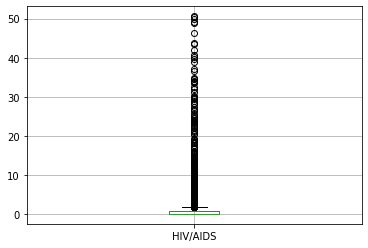

In [ ]:
df.boxplot("HIV/AIDS")

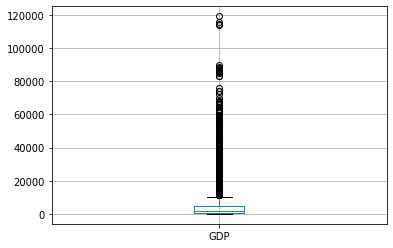

In [ ]:
df.boxplot("GDP")

In [ ]:
hepatitis=df['Hepatitis B']
life=df['Life expectancy']
infants=df['infant deaths']
alcohol=df['Alcohol']
measles=df['Measles']
bmi=df['BMI']
polio=df['Polio']
diphtheria=df['Diphtheria']
hiv=df['HIV/AIDS']
gdp=df['GDP']

Text(0.5, 0, 'infant deaths')

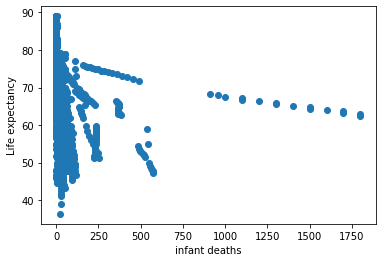

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(infants,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("infant deaths")

Text(0.5, 0, 'Alcohol')

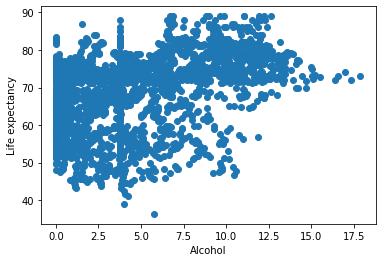

In [ ]:
plt.plot(alcohol,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("Alcohol")

Text(0.5, 0, 'Hepatitis')

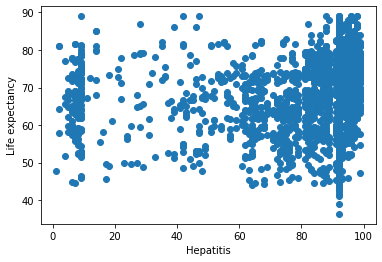

In [ ]:
plt.plot(hepatitis,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("Hepatitis")

Text(0.5, 0, 'Measles')

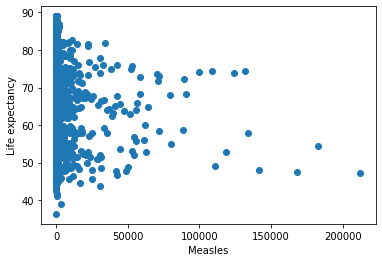

In [ ]:
plt.plot(measles,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("Measles")

Text(0.5, 0, 'BMI')

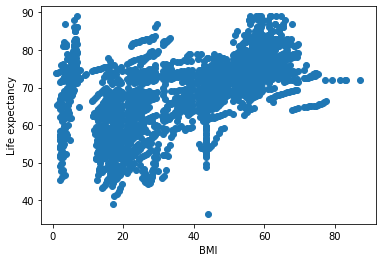

In [ ]:
plt.plot(bmi,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("BMI")

Text(0.5, 0, 'Polio')

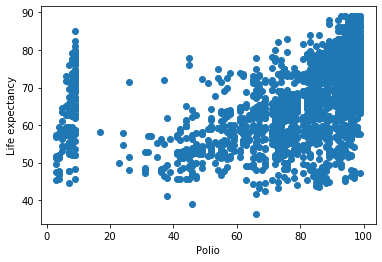

In [ ]:
plt.plot(polio,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("Polio")

Text(0.5, 0, 'Diphtheria')

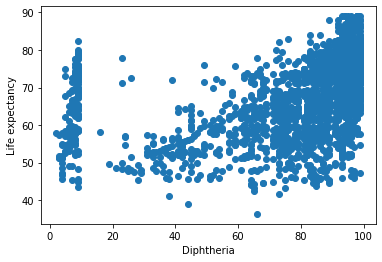

In [ ]:
plt.plot(diphtheria,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("Diphtheria")

Text(0.5, 0, 'HIV/AIDS')

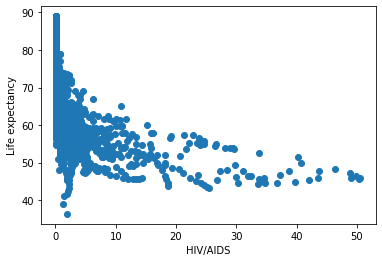

In [ ]:
plt.plot(hiv,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("HIV/AIDS")

Text(0.5, 0, 'GDP')

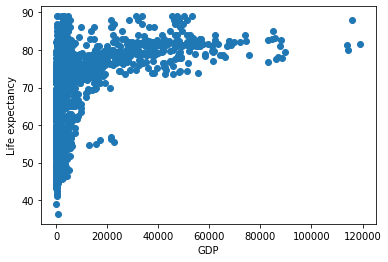

In [ ]:
plt.plot(gdp,life,'o') #o is plot style
plt.ylabel("Life expectancy")
plt.xlabel("GDP")

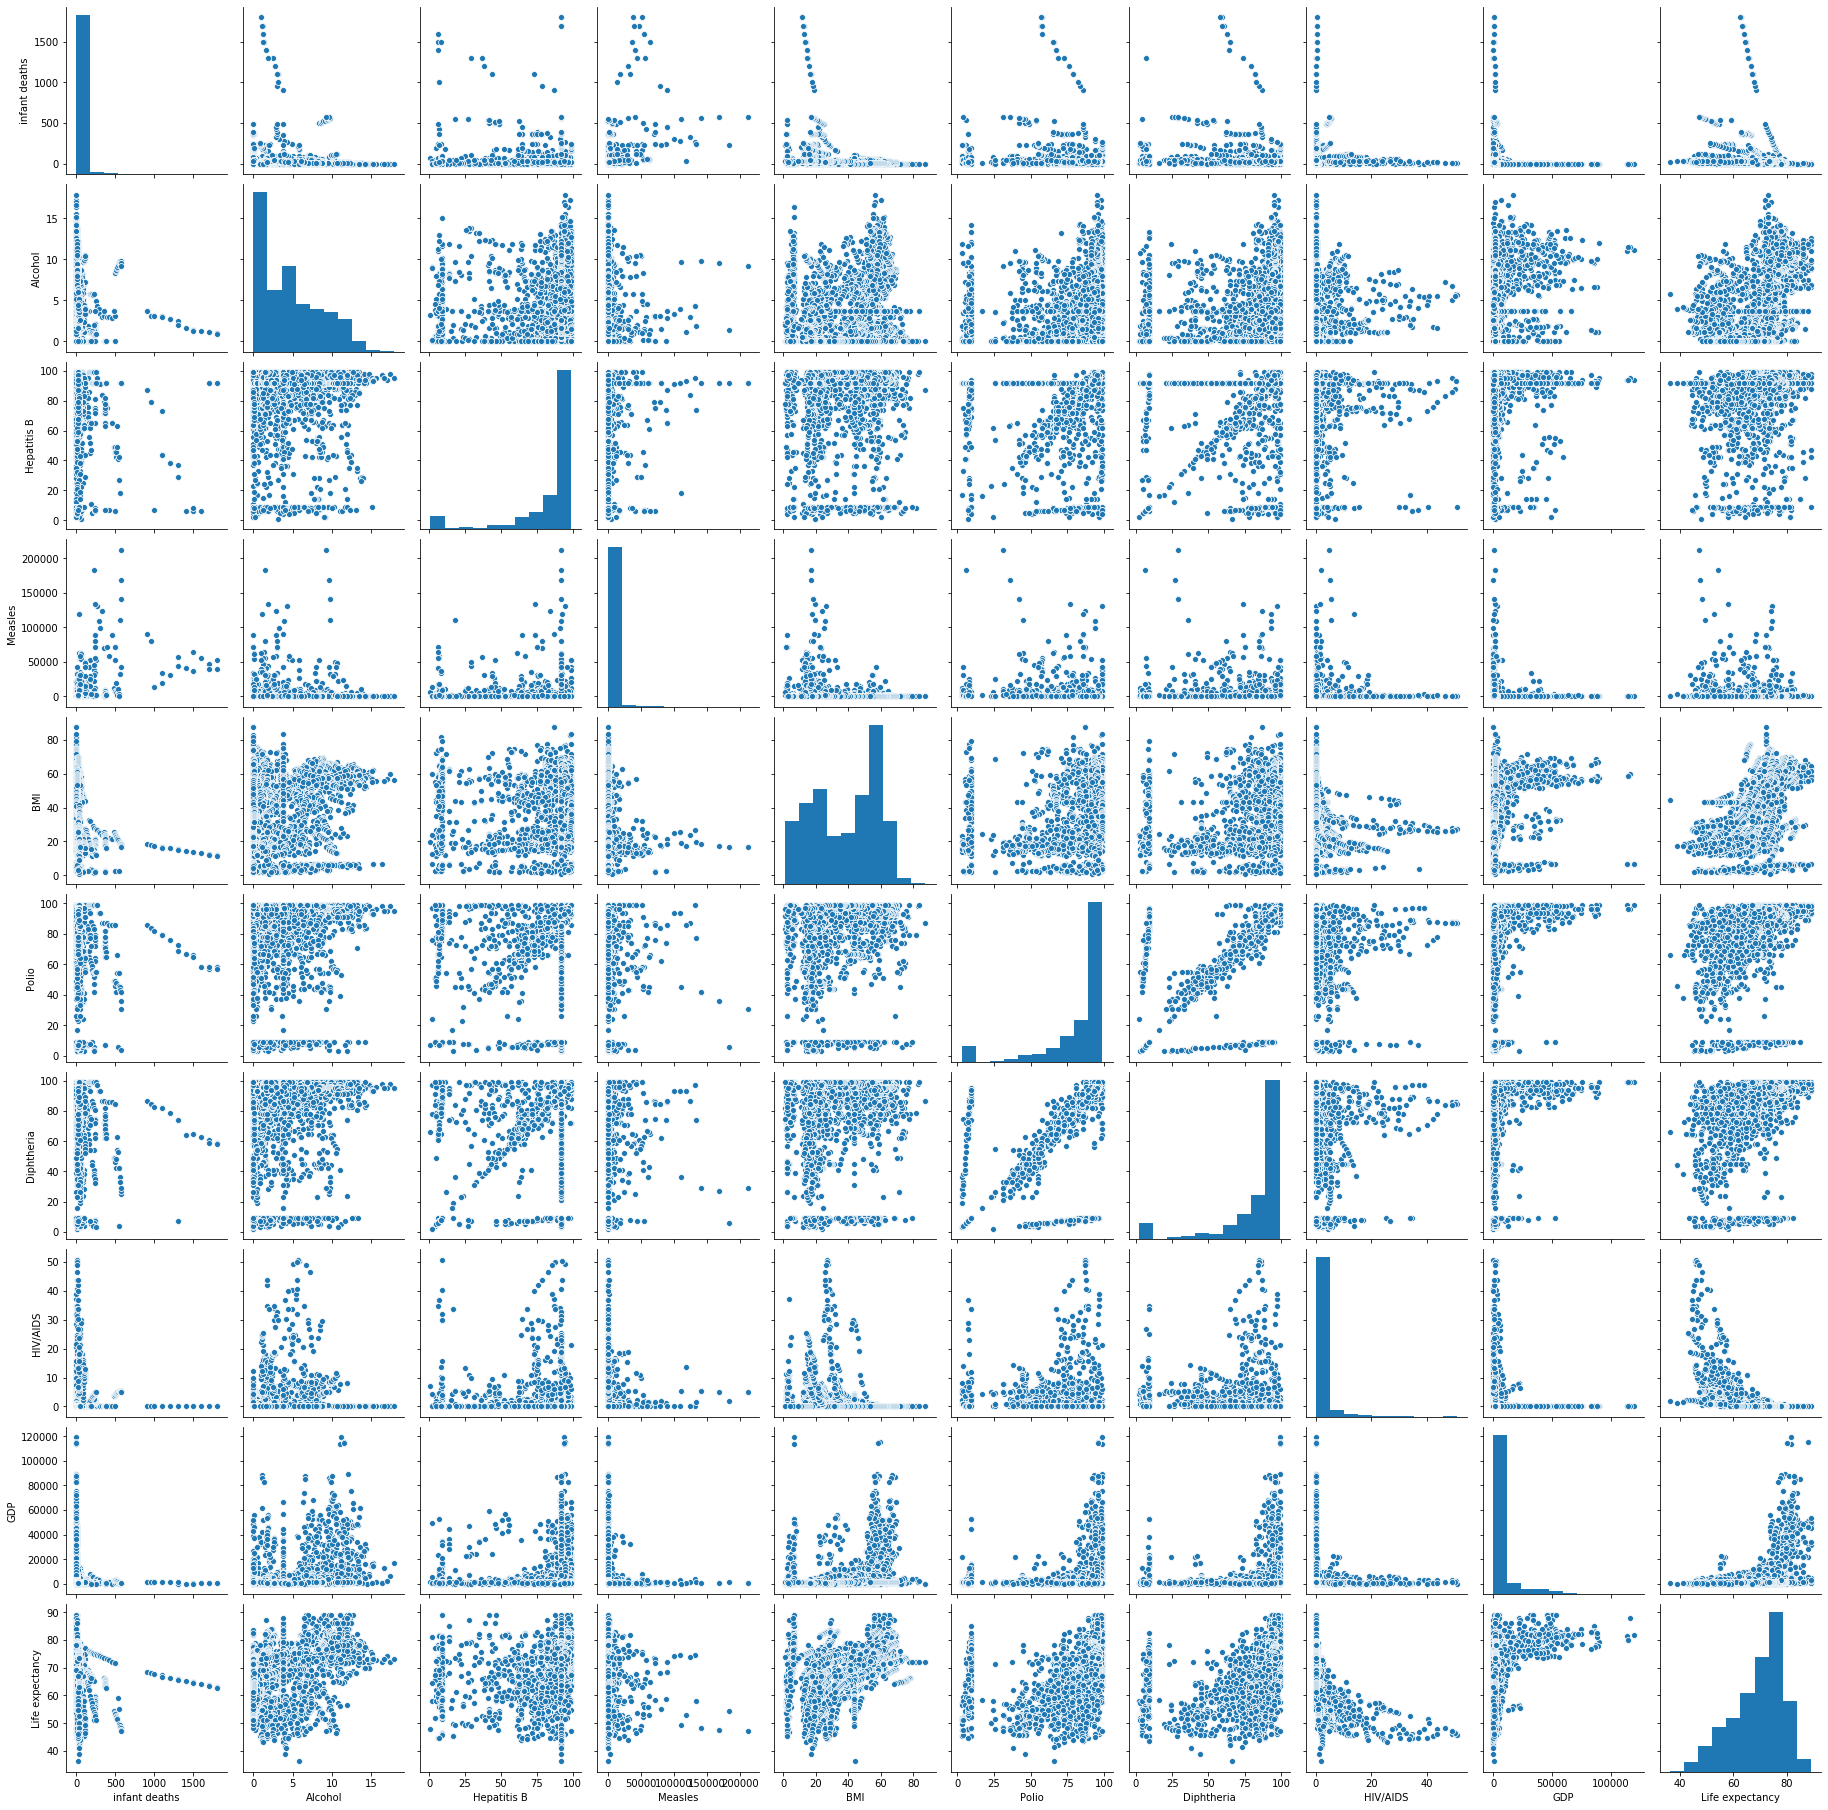

In [ ]:
import seaborn as sns
sns.pairplot(df)

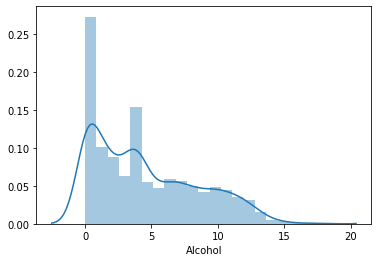

In [ ]:
import seaborn as sns
sns.distplot(df['Alcohol'])

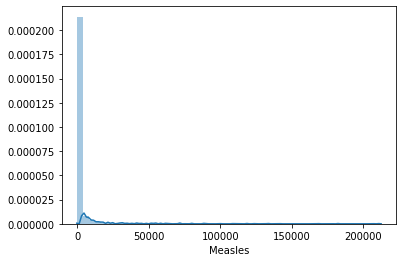

In [ ]:
sns.distplot(df['Measles'])

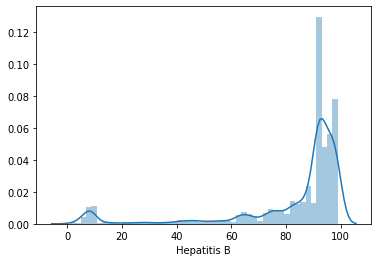

In [ ]:
sns.distplot(df['Hepatitis B'])

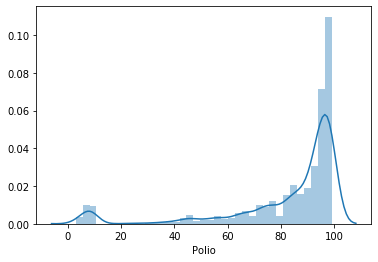

In [ ]:
sns.distplot(df['Polio'])

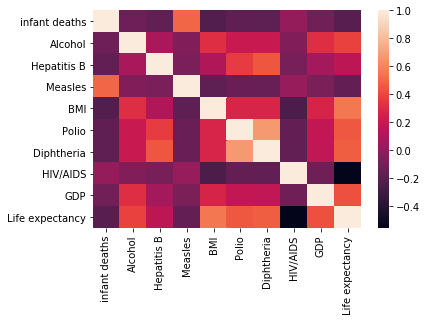

In [ ]:
# Plot the correlation usinf heatmap
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [ ]:
mean_life=df['Life expectancy'].mean()

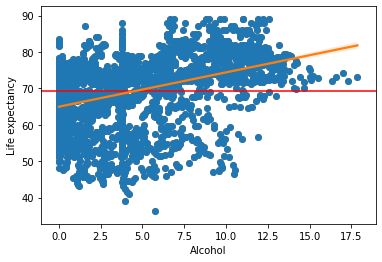

In [ ]:
#regression plot
plt.plot(alcohol,life,'o') 
plt.ylabel("life expectancy")
plt.xlabel("alcohol")
plt.axhline(mean_life,color='r',linestyle='-')
sns.regplot(x='Alcohol',y='Life expectancy',data=df)

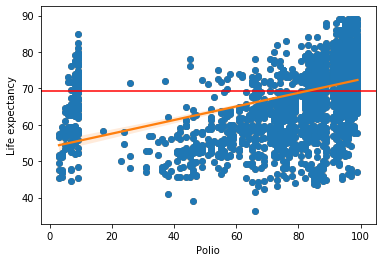

In [ ]:
#regression plot
plt.plot(polio,life,'o') 
plt.ylabel("life expectancy")
plt.xlabel("Polio")
plt.axhline(mean_life,color='r',linestyle='-')

sns.regplot(x='Polio',y='Life expectancy',data=df)

# simple linear regression

In [ ]:
import statsmodels.api as sm
model1=sm.OLS(life,alcohol).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              4710.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:58:34   Log-Likelihood:                         -15240.
No. Observations:                2938   AIC:                                  3.048e+04
Df Residuals:                    2937   BIC:                                  3.049e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alcohol        9.1344      0.133     68.626      0.000       8.873       9.395
==============================================================================
Omnibus:                      216.922   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.251
Skew:                          -0.566   Prob(JB):                     2.43e-43
Kurtosis:                       2.433   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['Alcohol']
y=df['Life expectancy']

In [ ]:
# X reshape
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

accuracy=model.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")


#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.16621127333944852
Accuracy of the test model: 0.12581234577789568


The model performance for training set 
--------------------------------------
RMSE is 8.764860331941255
R2 score is 0.16621127333944852


The model performance for testing set 
--------------------------------------
RMSE is 8.758558044675773
R2 score is 0.12581234577789568


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

accuracy=model.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.15832121669993204
Accuracy of the test model: 0.13296136579493445


The model performance for training set 
--------------------------------------
RMSE is 8.79174180948034
R2 score is 0.15832121669993204


The model performance for testing set 
--------------------------------------
RMSE is 8.686625698382143
R2 score is 0.13296136579493445


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

accuracy=model.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.1588363424532424
Accuracy of the test model: 0.11780312540772586


The model performance for training set 
--------------------------------------
RMSE is 8.766841044221897
R2 score is 0.1588363424532424


The model performance for testing set 
--------------------------------------
RMSE is 8.733054745462058
R2 score is 0.11780312540772586


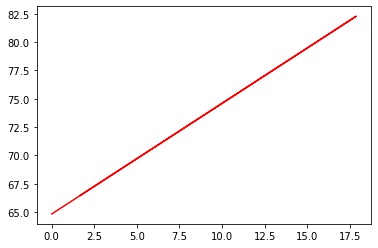

In [ ]:
y_predicted = model.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

In [ ]:
import statsmodels.api as sm
model1=sm.OLS(life,bmi).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                          1.493e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:58:47   Log-Likelihood:                         -13994.
No. Observations:                2938   AIC:                                  2.799e+04
Df Residuals:                    2937   BIC:                                  2.800e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            1.4771      0.012    122.196      0.000       1.453       1.501
==============================================================================
Omnibus:                      163.901   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.357
Skew:                           0.545   Prob(JB):                     4.56e-37
Kurtosis:                       2.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['BMI']
y=df['Life expectancy']

In [ ]:
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results=model1.fit(X_train,y_train)

accuracy=model1.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model1.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model1.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model1.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.32849473776643
Accuracy of the test model: 0.278222354732641


The model performance for training set 
--------------------------------------
RMSE is 7.865778286257784
R2 score is 0.32849473776643


The model performance for testing set 
--------------------------------------
RMSE is 7.958514128091069
R2 score is 0.278222354732641


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results=model1.fit(X_train,y_train)

accuracy=model1.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model1.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model1.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model1.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.3223699102787284
Accuracy of the test model: 0.27792793121725223


The model performance for training set 
--------------------------------------
RMSE is 7.888566242318558
R2 score is 0.3223699102787284


The model performance for testing set 
--------------------------------------
RMSE is 7.927242734261524
R2 score is 0.27792793121725223


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results=model1.fit(X_train,y_train)

accuracy=model1.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model1.score(X_test,y_test)
print('Accuracy of the test model:',a)
print("\n")

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model1.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model1.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.32051677135802686
Accuracy of the test model: 0.2645448966436088


The model performance for training set 
--------------------------------------
RMSE is 7.87938375465303
R2 score is 0.3205167713580269


The model performance for testing set 
--------------------------------------
RMSE is 7.973729675719523
R2 score is 0.2645448966436088


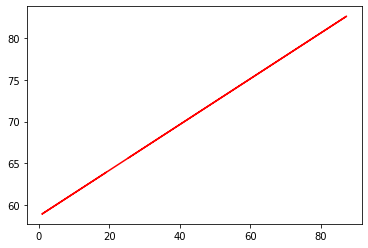

In [ ]:
y_predicted = model1.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

In [ ]:
import statsmodels.api as sm
model4=sm.OLS(life,polio).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          4.723e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:58:54   Log-Likelihood:                         -12477.
No. Observations:                2938   AIC:                                  2.496e+04
Df Residuals:                    2937   BIC:                                  2.496e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Polio          0.7898      0.004    217.331      0.000       0.783       0.797
==============================================================================
Omnibus:                     1290.349   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5890.715
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                       8.473   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['Polio']
y=df['Life expectancy']

In [ ]:
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model4=lm.LinearRegression()
results=model4.fit(X_train,y_train)

accuracy=model4.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model4.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model4.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model4.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.22623449377147187
Accuracy of the test model: 0.18174215614028963



The model performance for training set 
--------------------------------------
RMSE is 8.443483776069487
R2 score is 0.22623449377147187


The model performance for testing set 
--------------------------------------
RMSE is 8.473744531241815
R2 score is 0.18174215614028966


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model4=lm.LinearRegression()
results=model4.fit(X_train,y_train)

accuracy=model4.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model4.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model4.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model4.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.21929124796207533
Accuracy of the test model: 0.18602735775603974



The model performance for training set 
--------------------------------------
RMSE is 8.467325586070995
R2 score is 0.21929124796207533


The model performance for testing set 
--------------------------------------
RMSE is 8.416601939799072
R2 score is 0.18602735775603974


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model4=lm.LinearRegression()
results=model4.fit(X_train,y_train)

accuracy=model4.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model4.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model4.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model4.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.21815806487600198
Accuracy of the test model: 0.1737069231383349



The model performance for training set 
--------------------------------------
RMSE is 8.452055928793524
R2 score is 0.21815806487600198


The model performance for testing set 
--------------------------------------
RMSE is 8.451824729284873
R2 score is 0.1737069231383349


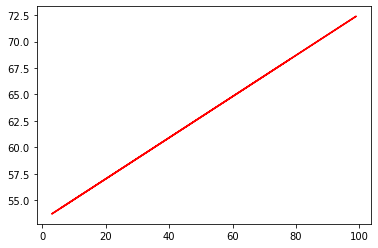

In [ ]:
y_predicted = model4.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

In [ ]:
import statsmodels.api as sm
model5=sm.OLS(life,diphtheria).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          4.671e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:59:03   Log-Likelihood:                         -12492.
No. Observations:                2938   AIC:                                  2.499e+04
Df Residuals:                    2937   BIC:                                  2.499e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Diphtheria     0.7908      0.004    216.128      0.000       0.784       0.798
==============================================================================
Omnibus:                     1256.471   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5473.393
Skew:                           2.087   Prob(JB):                         0.00
Kurtosis:                       8.224   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['Diphtheria']
y=df['Life expectancy']

In [ ]:
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model5=lm.LinearRegression()
results=model5.fit(X_train,y_train)

accuracy=model5.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model5.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model5.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model5.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.2447009812339579
Accuracy of the test model: 0.18565170035048617



The model performance for training set 
--------------------------------------
RMSE is 8.342120345548253
R2 score is 0.2447009812339579


The model performance for testing set 
--------------------------------------
RMSE is 8.4534769927299
R2 score is 0.18565170035048617


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model5=lm.LinearRegression()
results=model5.fit(X_train,y_train)

accuracy=model5.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model5.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model5.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model5.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.23413241458004466
Accuracy of the test model: 0.19374084858906182



The model performance for training set 
--------------------------------------
RMSE is 8.386458071171349
R2 score is 0.23413241458004463


The model performance for testing set 
--------------------------------------
RMSE is 8.376627672799138
R2 score is 0.19374084858906182


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model5=lm.LinearRegression()
results=model5.fit(X_train,y_train)

accuracy=model5.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model5.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model5.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model5.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.2342123043639932
Accuracy of the test model: 0.17268422958405139



The model performance for training set 
--------------------------------------
RMSE is 8.364829127805995
R2 score is 0.2342123043639932


The model performance for testing set 
--------------------------------------
RMSE is 8.457053475621219
R2 score is 0.17268422958405139


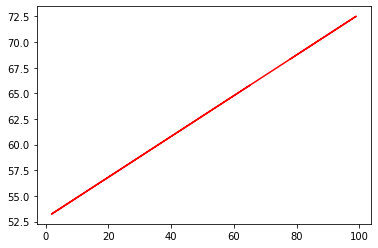

In [ ]:
y_predicted = model5.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

In [ ]:
import statsmodels.api as sm
model6=sm.OLS(life,gdp).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.244
Model:                            OLS   Adj. R-squared (uncentered):              0.243
Method:                 Least Squares   F-statistic:                              946.0
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                   2.49e-180
Time:                        14:59:09   Log-Likelihood:                         -16236.
No. Observations:                2938   AIC:                                  3.247e+04
Df Residuals:                    2937   BIC:                                  3.248e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            0.0023   7.55e-05     30.757      0.000       0.002       0.002
==============================================================================
Omnibus:                     2207.252   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38515.721
Skew:                          -3.495   Prob(JB):                         0.00
Kurtosis:                      19.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['GDP']
y=df['Life expectancy']

In [ ]:
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model6=lm.LinearRegression()
results=model6.fit(X_train,y_train)

accuracy=model6.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model6.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model6.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model6.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.19385002738623947
Accuracy of the test model: 0.17082999200826743



The model performance for training set 
--------------------------------------
RMSE is 8.618365579563235
R2 score is 0.19385002738623947


The model performance for testing set 
--------------------------------------
RMSE is 8.530059694790271
R2 score is 0.17082999200826743


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model6=lm.LinearRegression()
results=model6.fit(X_train,y_train)

accuracy=model6.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model6.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model6.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model6.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.1877711041291096
Accuracy of the test model: 0.17833053687030975



The model performance for training set 
--------------------------------------
RMSE is 8.6365631630454
R2 score is 0.18777110412910958


The model performance for testing set 
--------------------------------------
RMSE is 8.45630146631888
R2 score is 0.17833053687030975


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model6=lm.LinearRegression()
results=model6.fit(X_train,y_train)

accuracy=model6.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model6.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model6.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model6.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.1846221412428799
Accuracy of the test model: 0.18738050975646814



The model performance for training set 
--------------------------------------
RMSE is 8.631421774900048
R2 score is 0.1846221412428799


The model performance for testing set 
--------------------------------------
RMSE is 8.381602152823454
R2 score is 0.18738050975646814


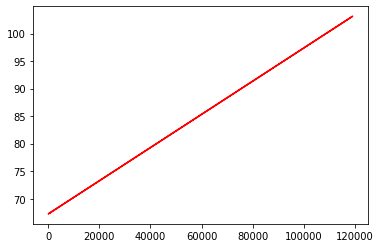

In [ ]:
y_predicted = model6.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

In [ ]:
import statsmodels.api as sm
model7=sm.OLS(life,hiv).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.062
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              195.7
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                    4.35e-43
Time:                        14:59:22   Log-Likelihood:                         -16551.
No. Observations:                2938   AIC:                                  3.310e+04
Df Residuals:                    2937   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HIV/AIDS       3.2538      0.233     13.988      0.000       2.798       3.710
==============================================================================
Omnibus:                     2207.700   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40020.787
Skew:                          -3.478   Prob(JB):                         0.00
Kurtosis:                      19.689   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df['HIV/AIDS']
y=df['Life expectancy']

In [ ]:
X=X.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model7=lm.LinearRegression()
results=model7.fit(X_train,y_train)

accuracy=model7.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model7.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model7.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model7.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.3035487839115203
Accuracy of the test model: 0.3195938739469467



The model performance for training set 
--------------------------------------
RMSE is 8.010550102336149
R2 score is 0.3035487839115203


The model performance for testing set 
--------------------------------------
RMSE is 7.727061798785369
R2 score is 0.3195938739469467


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model7=lm.LinearRegression()
results=model7.fit(X_train,y_train)

accuracy=model7.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model7.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model7.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model7.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.3065977712657699
Accuracy of the test model: 0.31773399117072143



The model performance for training set 
--------------------------------------
RMSE is 7.979843098299566
R2 score is 0.3065977712657699


The model performance for testing set 
--------------------------------------
RMSE is 7.705640633926791
R2 score is 0.31773399117072143


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train=X_train.reshape(-1,1)
from sklearn import linear_model as lm
model7=lm.LinearRegression()
results=model7.fit(X_train,y_train)

accuracy=model7.score(X_train,y_train)
print('Accuracy of the train model:',accuracy)

a=model7.score(X_test,y_test)
print('Accuracy of the test model:',a)
print('\n\n')

#evaluating the model 
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model7.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model7.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print("The model performance for training set ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

#model evaluation for test set
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set ")
print('--------------------------------------')
print('RMSE is {}'.format(rmse_testing))
print('R2 score is {}'.format(r2_testing))

Accuracy of the train model: 0.3126016806369917
Accuracy of the test model: 0.29580467809051414



The model performance for training set 
--------------------------------------
RMSE is 7.925143137753585
R2 score is 0.3126016806369917


The model performance for testing set 
--------------------------------------
RMSE is 7.802432012256735
R2 score is 0.29580467809051414


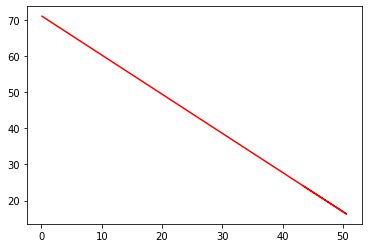

In [ ]:
y_predicted = model7.predict(X)
plt.plot(X, y_predicted, color='r')
plt.show()

# multiple linear regression

In [ ]:
X=df[["Hepatitis B","Polio","Diphtheria",]]
y=df["Life expectancy"]

In [ ]:
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          2.295e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:59:30   Log-Likelihood:                         -11950.
No. Observations:                2938   AIC:                                  2.391e+04
Df Residuals:                    2935   BIC:                                  2.392e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Hepatitis B     0.2384      0.011     21.263      0.000       0.216       0.260
Polio           0.3162      0.014     21.909      0.000       0.288       0.344
Diphtheria      0.2520      0.015     16.378      0.000       0.222       0.282
==============================================================================
Omnibus:                      795.220   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2280.259
Skew:                           1.403   Prob(JB):                         0.00
Kurtosis:                       6.279   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values
labels = y_train.iloc[:].values

X=features
y=labels

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the training model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.28874821969386255


The model performance of training model
--------------------------------------
RMSE is 8.095220334018379
R2 score is 0.28874821969386255




In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_test.iloc[:,:].values
labels = y_test.iloc[:].values

X=features
y=labels

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the testing model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.22874914204284413


The model performance of testing model
--------------------------------------
RMSE is 8.22674636782927
R2 score is 0.22874914204284413




In [ ]:
X1=df[["Hepatitis B","Polio","Diphtheria",]]
y1=df["Life expectancy"]

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size = 0.3, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_train1.iloc[:,:].values
labels1 = y_train1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the training model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.2757442219204985


The model performance of training model
--------------------------------------
RMSE is 8.155446065560517
R2 score is 0.2757442219204985




In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_test1.iloc[:,:].values
labels1 = y_test1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the testing model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.2374637299116132


The model performance of testing model
--------------------------------------
RMSE is 8.146332580401324
R2 score is 0.23746372991161324




In [ ]:
X2=df[["Hepatitis B","Polio","Diphtheria",]]
y2=df["Life expectancy"]

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.2, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_train2.iloc[:,:].values
labels2 = y_train2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the training model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.2745021926173493


The model performance of training model
--------------------------------------
RMSE is 8.141809449879352
R2 score is 0.2745021926173493




In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_test2.iloc[:,:].values
labels2 = y_test2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the testing model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.22646820402581036


The model performance of testing model
--------------------------------------
RMSE is 8.177536857880968
R2 score is 0.22646820402581036




In [ ]:
X=df[["Alcohol","Hepatitis B","BMI","Polio","Diphtheria",]]

In [ ]:
y=df["Life expectancy"]

In [ ]:
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.736e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:59:41   Log-Likelihood:                         -11621.
No. Observations:                2938   AIC:                                  2.325e+04
Df Residuals:                    2933   BIC:                                  2.328e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Alcohol         0.5066      0.063      7.998      0.000       0.382       0.631
Hepatitis B     0.2204      0.010     21.931      0.000       0.201       0.240
BMI             0.2866      0.013     22.834      0.000       0.262       0.311
Polio           0.2423      0.013     18.368      0.000       0.216       0.268
Diphtheria      0.1858      0.014     13.297      0.000       0.158       0.213
==============================================================================
Omnibus:                      600.549   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.369
Skew:                           1.199   Prob(JB):                    6.74e-268
Kurtosis:                       5.074   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values

In [ ]:
labels = y_train.iloc[:].values

In [ ]:
X=features
y=labels

In [ ]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the training model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.4982661840740784


The model performance of training model
--------------------------------------
RMSE is 6.799135195691162
R2 score is 0.4982661840740784




In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_test.iloc[:,:].values
labels = y_test.iloc[:].values

In [ ]:
X=features
y=labels

In [ ]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the testing model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.42828972897627005


The model performance of testing model
--------------------------------------
RMSE is 7.083016856214643
R2 score is 0.42828972897627005




In [ ]:
X1=df[["Alcohol","Hepatitis B","BMI","Polio","Diphtheria",]]

In [ ]:
y1=df["Life expectancy"]

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size = 0.3, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_train1.iloc[:,:].values
labels1 = y_train1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the training model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.48496468619144134


The model performance of training model
--------------------------------------
RMSE is 6.877335947883618
R2 score is 0.4849646861914413




In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_test1.iloc[:,:].values
labels1 = y_test1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the testing model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.4361264164757199


The model performance of testing model
--------------------------------------
RMSE is 7.005235796169147
R2 score is 0.4361264164757199




In [ ]:
X2=df[["Alcohol","Hepatitis B","BMI","Polio","Diphtheria",]]
y2=df["Life expectancy"]

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.2, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_train2.iloc[:,:].values
labels2 = y_train2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the training model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.4829666472222241


The model performance of training model
--------------------------------------
RMSE is 6.873250329837496
R2 score is 0.48296664722222415




In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_test2.iloc[:,:].values
labels2 = y_test2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the testing model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.4205350890749657


The model performance of testing model
--------------------------------------
RMSE is 7.077778978764409
R2 score is 0.4205350890749656




In [ ]:
X=df[["infant deaths","Alcohol","Hepatitis B","Measles","BMI","Polio","Diphtheria","HIV/AIDS","GDP"]]

In [ ]:
y=df["Life expectancy"]

In [ ]:
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.031e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        14:59:55   Log-Likelihood:                         -11524.
No. Observations:                2938   AIC:                                  2.307e+04
Df Residuals:                    2929   BIC:                                  2.312e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
infant deaths     0.0219      0.002      9.875      0.000       0.018       0.026
Alcohol           0.4720      0.063      7.462      0.000       0.348       0.596
Hepatitis B       0.2209      0.010     22.382      0.000       0.202       0.240
Measles        5.384e-05   2.29e-05      2.356      0.019    9.03e-06    9.86e-05
BMI               0.2903      0.013     23.218      0.000       0.266       0.315
Polio             0.2356      0.013     18.411      0.000       0.211       0.261
Diphtheria        0.1822      0.014     13.454      0.000       0.156       0.209
HIV/AIDS         -0.1954      0.045     -4.364      0.000      -0.283      -0.108
GDP            7.403e-05   1.83e-05      4.043      0.000    3.81e-05       0.000
==============================================================================
Omnibus:                      679.893   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1539.192
Skew:                           1.300   Prob(JB):                         0.00
Kurtosis:                       5.412   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values
labels=y_train.iloc[:].values

X=features
y=labels

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of training data")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the model: 0.6843184138613623


The model performance of training data
--------------------------------------
RMSE is 5.393139022935425
R2 score is 0.6843184138613623




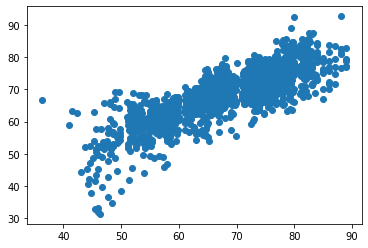

In [ ]:
#Visualize the predictions
plt.scatter(y, predictions)

In [ ]:
# define the data/predictors as the pre-set feature names  
features = X_test.iloc[:,:].values
labels = y_test.iloc[:].values

X=features
y=labels


# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

predictions = model.predict(X)

#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the testing model:', accuracy)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.6582402318749088


The model performance of testing model
--------------------------------------
RMSE is 5.47634432063013
R2 score is 0.6582402318749088




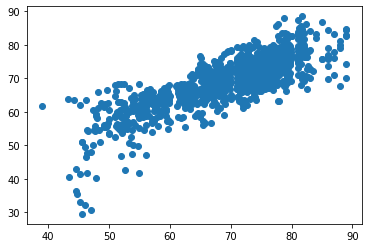

In [ ]:
#Visualize the predictions
plt.scatter(y, predictions)

In [ ]:
X1=df[["infant deaths","Alcohol","Hepatitis B","Measles","BMI","Polio","Diphtheria","HIV/AIDS","GDP"]]

In [ ]:
y1=df["Life expectancy"]

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size = 0.3, random_state=1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_train1.iloc[:,:].values
labels1 = y_train1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the training model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.6775829229415076


The model performance of training model
--------------------------------------
RMSE is 5.441401272525119
R2 score is 0.6775829229415076




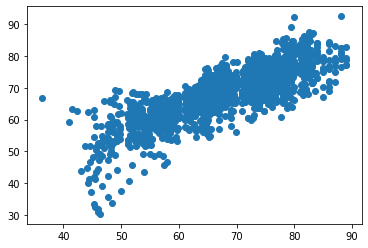

In [ ]:
#Visualize the predictions
plt.scatter(y1, predictions1)

In [ ]:
# define the data/predictors as the pre-set feature names  
features1 = X_test1.iloc[:,:].values
labels1 = y_test1.iloc[:].values

X1=features1
y1=labels1

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results1=model1.fit(X1,y1) 

predictions1 = model1.predict(X1)

#Check model accuracy
accuracy1=model1.score(X1,y1)
print('Accuracy of the testing model:', accuracy1)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y1,predictions1)))
r2 = r2_score(y1,predictions1)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.6644440401061892


The model performance of testing model
--------------------------------------
RMSE is 5.403987827023707
R2 score is 0.6644440401061892




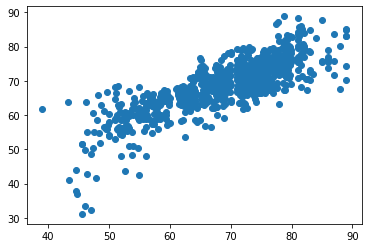

In [ ]:
#Visualize the predictions
plt.scatter(y1, predictions1)

In [ ]:
X2=df[["infant deaths","Alcohol","Hepatitis B","Measles","BMI","Polio","Diphtheria","HIV/AIDS","GDP"]]
y2=df["Life expectancy"]

In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_train2.iloc[:,:].values
labels2 = y_train2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the training model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of training model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the training model: 0.4829666472222241


The model performance of training model
--------------------------------------
RMSE is 6.873250329837496
R2 score is 0.48296664722222415




In [ ]:
# define the data/predictors as the pre-set feature names  
features2 = X_test2.iloc[:,:].values
labels2 = y_test2.iloc[:].values

X2=features2
y2=labels2

# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results2=model2.fit(X2,y2) 

predictions2 = model2.predict(X2)

#Check model accuracy
accuracy2=model2.score(X2,y2)
print('Accuracy of the testing model:', accuracy2)
print("\n")

#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = (np.sqrt(mean_squared_error(y2,predictions2)))
r2 = r2_score(y2,predictions2)

print("The model performance of testing model")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Accuracy of the testing model: 0.4205350890749657


The model performance of testing model
--------------------------------------
RMSE is 7.077778978764409
R2 score is 0.4205350890749656




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=1)
X_train.shape
y_train.shape 
X_test.shape 
y_test.shape

(471,)

In [ ]:
# Build the linear regression model using LinearRegression()
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()

# Fit the model to our training data

regressor.fit(X_train, y_train)

# Print the values of coefficients of each feature

print(regressor.coef_)

[-2.57126369e-03  3.60970098e-01 -1.93845660e-02 -4.69125759e-05
  1.06295973e-01  3.98237451e-02  7.55729308e-02 -7.85091678e-01
  1.44850749e-04]


In [ ]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test)
print(test_pred)

[71.75783029 71.17557042 68.75031924 74.19105178 67.1197445  72.13659479
 74.70065873 83.23044413 67.99493655 66.73593584 69.64714315 73.67933109
 85.95481069 62.6748184  82.51754086 67.88867012 63.4139954  61.11361967
 74.9425573  72.87483412 71.22585773 68.49940669 71.10979674 69.37812332
 56.8396133  70.20618194 67.54327453 75.86220209 73.8298974  67.45614114
 68.71889726 72.82392758 66.3370123  72.02321969 68.09068097 71.84258977
 71.70041928 76.2748876  71.56017499 78.57316408 75.29876465 68.77258459
 74.1673389  66.52353242 78.48685052 34.36215223 78.47073198 67.1984135
 77.50284124 66.2050207  32.08164383 71.41411713 69.07317839 77.62823
 63.74368729 73.55363425 77.55122755 76.20598488 50.27081186 51.83102277
 74.2299998  67.71293895 74.58403551 76.34770332 81.55249604 72.9680328
 68.21560996 57.31256377 75.3579092  69.68863607 68.23897861 61.46340744
 68.98054195 68.66531405 68.49726227 59.36897087 64.70661186 75.85094743
 68.13796189 73.55780884 68.31937957 79.01007845 71.9929

In [ ]:
predicted_data = np.round_(test_pred)
print(predicted_data)

[70. 77. 68. 67. 78. 48. 74. 88. 73. 70. 70. 69. 69. 62. 63. 74. 74. 65.
 69. 73. 76. 64. 59. 73. 66. 64. 76. 71. 67. 66. 76. 61. 60. 63. 72. 73.
 67. 63. 66. 68. 74. 73. 58. 73. 61. 59. 75. 75. 71. 74. 67. 79. 66. 77.
 82. 69. 65. 68. 59. 72. 75. 73. 71. 75. 69. 58. 71. 66. 73. 73. 65. 74.
 73. 67. 75. 62. 72. 67. 58. 75. 67. 72. 64. 65. 83. 63. 66. 71. 63. 72.
 67. 61. 73. 65. 76. 76. 79. 55. 76. 69. 72. 33. 75. 67. 81. 71. 74. 71.
 70. 66. 80. 74. 61. 67. 69. 74. 70. 52. 75. 74. 74. 84. 74. 76. 80. 68.
 43. 73. 63. 74. 78. 73. 75. 65. 77. 69. 76. 61. 86. 73. 70. 77. 72. 82.
 63. 63. 65. 42. 66. 68. 67. 74. 70. 76. 64. 73. 73. 75. 78. 70. 76. 75.
 76. 67. 75. 69. 71. 71. 81. 77. 68. 64. 71. 79. 73. 73. 65. 82. 69. 80.
 68. 65. 72. 77. 74. 68. 74. 73. 58. 70. 73. 76. 72. 72. 73. 74. 76. 58.
 64. 72. 52. 72. 55. 63. 62. 78. 61. 69. 56. 62. 78. 75. 72. 75. 75. 77.
 62. 75. 64. 73. 84. 68. 78. 68. 48. 76. 59. 68. 70. 70. 63. 69. 69. 65.
 70. 70. 74. 76. 68. 58. 74. 72. 77. 71. 83. 69. 73

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))

Mean Absolute Error: 4.488180287214854
Mean Squared Error: 34.77511117316347
Root Mean Squared Error: 5.89704257854422


In [ ]:
# Display coefficients of each feature

coefficients = pd.DataFrame(regressor.coef_) 
coefficients.columns = ['Coefficient']
for col in data.columns:
    print(col)
print(coefficients)

## These coefficients show the impact of each value on the 'life expectancy' as the target when all other features are fixed.
## an increase of 1 in alcohol will lead an increase of 0.36 in the life expectancy
## an increase of 1 in HIV?AIDS  will cause a decrease of 0.78 in life expectancy

infant deaths
Alcohol
Hepatitis B
Measles 
 BMI 
Polio
Diphtheria 
 HIV/AIDS
GDP
Life expectancy 
   Coefficient
0    -0.002571
1     0.360970
2    -0.019385
3    -0.000047
4     0.106296
5     0.039824
6     0.075573
7    -0.785092
8     0.000145
